<a href="https://colab.research.google.com/github/amitpant7/pulmonary-disease-classification/blob/main/basic_aug_resnet_train1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [ ]:
# #Installing gpu for faster training
# #Ensure GPU is selected in Runtime 
# !pip install tensorflow-gpu

In [ ]:
#checking for tpu and gpu 
#print("TPU devices:", tf.config.list_logical_devices('TPU'))
!nvidia-smi

Thu Jan 19 16:12:30 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   62C    P0    29W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# Importing all libraries. Add libraries here

In [ ]:
import os 
import shutil
import zipfile
import requests
import matplotlib.pyplot as plt
from tqdm.autonotebook import tqdm          #for creating libraries  
from matplotlib.font_manager import FontProperties

%matplotlib inline
os.chdir('/content/drive/MyDrive')


<ipython-input-3-3e3f1645ba12>:6: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm          #for creating libraries


In [ ]:
os.getcwd()

'/content/drive/MyDrive'

This code checks if the file is in the path. If it isn't, the code downlads the file from the URL.

In [ ]:
# url = "https://amitpant.com.np/dataset.zip"
# file_name = 'dataset.zip'

# if not os.path.isfile(file_name):
#   resp = requests.get(url)

#   with open(file_name,'wb') as file:
#     total_length = int(resp.headers.get('content-length'))
#     progress_bar = tqdm(total=total_length, unit='iB', unit_scale=True)

#     if total_length is None:
#       for chunk in resp:
#         file.write(chunk)

#     else:
#       length = 0
#       total_length = int(total_length)

#       for chunk in resp:
#         progress_bar.update(len(chunk))
#         file.write(chunk)

# else:
#   print("File exists.")

The zip file contains 5 folders. If the folders are present in the working directory, the code returns exists. However, if any of the folders are missing, the code checks for the other folders and deletes them so that there are no duplicate folders. Then the zip file is extracted.

In [ ]:
# # to check if all files exists, extract the zip file if the files doesn't exist

# Normal = os.path.join('Normal')
# TB_qatar = os.path.join('Tuberculosis-quatar')
# pnemo_png = os.path.join('pnemo_png')
# tb_shenzen = os.path.join('tb-shenzen')
# tb_montgomery = os.path.join('tb-montgomery')

# file_list = [Normal,TB_qatar,pnemo_png,tb_shenzen,tb_montgomery]
# flag = 0

# for i in file_list:
#   isExist = os.path.exists(i)
#   print(i,'exists :' ,str(isExist))
#   if not isExist:
#     flag = 1

# if (flag == 1): 
#   for i in file_list: 
#     try:
#       shutil.rmtree(os.path.join(i))
#     except OSError as e:
#       print("Error: %s - %s." % (e.filename, e.strerror))

#   print('Extracting Zip file:')
#   with zipfile.ZipFile(file_name , 'r') as zip_ref:
#     for member in tqdm(zip_ref.infolist(), desc='Extracting '):
#       zip_ref.extract(member)


This code deletes all lung related folders.

import shutil

Normal = os.path.join('Normal')
TB_qatar = os.path.join('Tuberculosis-quatar')
pnemo_png = os.path.join('pnemo_png')
tb_shenzen = os.path.join('tb-shenzen')
tb_montgomery = os.path.join('tb-montgomery')

file_list = [Normal,TB_qatar,pnemo_png,tb_shenzen,tb_montgomery]
for i in file_list: 
    try:
      shutil.rmtree(os.path.join(i))
    except OSError as e:
      print("Error: %s - %s." % (e.filename, e.strerror))

In [ ]:
# Normal_dataset = len(os.listdir(Normal))
# Pneumonia_dataset = len(os.listdir(pnemo_png))
# TB_dataset = len(os.listdir(tb_shenzen))+len(os.listdir(tb_montgomery))+len(os.listdir(TB_qatar))


In [ ]:
# from matplotlib import font_manager
# font_files = font_manager.findSystemFonts(fontpaths='/content/drive/MyDrive/Times New Roman', fontext='ttf')
# for font_file in font_files:
#     font_manager.fontManager.addfont(font_file)

# plt.rcParams['font.family'] = ['Times New Roman']

# plt.figure(dpi=600,figsize = (9, 4))
# plt.title('Lung dataset')
# plt.xlabel('Types of data')
# plt.ylabel('No. of files')

# x = ['No. of Healthy Lungs','No.of Pneumonia Infected Lungs','No. of Tb infected lungs']
# y= [Normal_dataset,Pneumonia_dataset,TB_dataset]
# bar_colors = ['blue','red','orange']
# plt.bar(x,y)

# for i in range(len(x)):
#   plt.text(i,y[i],y[i],ha = 'center')

# plt.show()


In [ ]:
# #Don't Run twice
# #Change Dataset for 3 labels 
# !pwd 
# !mkdir tb 
# !mv pnemo_png pnemo #rename

In [ ]:
# #Remove 
# #Move the images
# !mv /content/drive/MyDrive/tb-montgomery/* tb 
# !mv /content/drive/MyDrive/tb-shenzen/* tb
# !mv /content/drive/MyDrive/Tuberculosis-quatar/* tb


In [ ]:
# #Removing the directories
# !rmdir /content/drive/MyDrive/tb-montgomery
# !rmdir /content/drive/MyDrive/tb-shenzen
# !rmdir /content/drive/MyDrive/Tuberculosis-quatar/


In [ ]:
# #Moving to one folder
# !mkdir Dataset
# !mv /content/drive/MyDrive/pnemo /content/drive/MyDrive/Dataset/
# !mv /content/drive/MyDrive/tb /content/drive/MyDrive/Dataset/
# !mv /content/drive/MyDrive/Normal /content/drive/MyDrive/Dataset/

In [ ]:
#For splitting data into train, val and test
!pip install split-folders

#Splitting the data 
import splitfolders as sf
input_fold = '/content/drive/MyDrive/Dataset'
sf.ratio(input_fold, output = '/content/drive/MyDrive/final_dataset',
         seed = 112, 
         ratio = (0.7, 0.2, 0.1), 
         group_prefix = None, 
         move = True )

#Removing old Directories 
!rmdir /content/drive/MyDrive/Dataset/Normal
!rmdir /content/drive/MyDrive/Dataset/pnemo
!rmdir /content/drive/MyDrive/Dataset/tb
!rmdir /content/drive/MyDrive/Dataset

In [ ]:
import tensorflow as tf
from keras.activations import relu, linear
from keras.layers import Dense, Flatten, Dropout
from keras.models import Sequential 
from keras.applications import ResNet50

In [ ]:
# # Creating Dataset 
# train_data = tf.keras.utils.image_dataset_from_directory(
#     directory='/content/drive/MyDrive/final_dataset/train',
#     labels ='inferred',
#     label_mode = 'int',
#     image_size=(224, 224),
#     batch_size = 32
# )

# val_data = tf.keras.utils.image_dataset_from_directory(
#     directory='/content/drive/MyDrive/final_dataset/val',
#     labels ='inferred',
#     label_mode = 'int',
#     image_size=(224, 224),
#     batch_size = 32
# )

# test_data = tf.keras.utils.image_dataset_from_directory(
#     directory='/content/drive/MyDrive/final_dataset/test',
#     labels ='inferred',
#     label_mode = 'int',
#     image_size=(224, 224),
#     batch_size = 32
# )

# #Normalizing the dateset 
# def process(image, label):
#   image = tf.cast(image/255., tf.float32)
#   return image, label

# train_set = train_data.map(process)
# val_set = val_data.map(process)
# test_set = test_data.map(process)


#applying Image agumentation 

from keras.preprocessing.image import ImageDataGenerator

# Create an instance of the ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

# Generate augmented images from a directory of images
# Replace 'path_to_images' with the path to your images
train_set= train_datagen.flow_from_directory(
    '/content/drive/MyDrive/final_dataset/train',
    target_size=(224, 224),
    batch_size=32,
    shuffle=True,
    class_mode='sparse',   
    seed=15)

val_set= test_datagen.flow_from_directory(
    '/content/drive/MyDrive/final_dataset/val',
    target_size=(224, 224),
    batch_size=32,
     shuffle=True,
    class_mode='sparse',
       seed=15)

test_set= test_datagen.flow_from_directory(
    '/content/drive/MyDrive/final_dataset/test',
    target_size=(224, 224),
    batch_size=32,
     shuffle=True,
    class_mode='sparse',
       seed=15)


Found 12091 images belonging to 3 classes.
Found 3454 images belonging to 3 classes.
Found 1730 images belonging to 3 classes.


**Working with resnet50, Importing and freezing the layers and adding own layers**

In [ ]:
#Importing resnet50,preparing the base convolution 
conv_base = ResNet50(
    weights= 'imagenet',
    include_top = False,
    input_shape = (224, 224,3))
conv_base.trainable = False

94765736/94765736 [==============================] - 0s 0us/step


In [ ]:
#Analyzing the base
conv_base.summary()

#It will take a (224, 224,3 ) image and use diffrent convolutions with skip conncections and will produce a (7, 7, 2048) output

In [ ]:
#Preaparing our model 
from keras.layers import BatchNormalization

model_r = Sequential()
model_r.add(conv_base)
#model_r.add(tf.keras.layers.GlobalAveragePooling2D())
model_r.add(Flatten())
model_r.add(BatchNormalization())
model_r.add(Dense(512, activation='relu'))
model_r.add(Dropout(0.2))
model_r.add(BatchNormalization())
model_r.add(Dense(64, activation='relu'))
model_r.add(Dropout(0.2))
model_r.add(BatchNormalization())
model_r.add(Dense(3, activation= 'linear'))


In [ ]:
model_r.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d_1   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 flatten_2 (Flatten)         (None, 2048)              0         
                                                                 
 batch_normalization (BatchN  (None, 2048)             8192      
 ormalization)                                                   
                                                                 
 dense_6 (Dense)             (None, 512)               1049088   
                                                                 
 dropout_6 (Dropout)         (None, 512)              

In [ ]:
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint
call  = [
      ModelCheckpoint('/content/drive/MyDrive/resnet_model_best.h5', monitor='val_loss', save_best_only=True, mode='min')
]

model_r.compile(loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
              optimizer='adam',
             metrics=['accuracy'],
              )

In [ ]:
#Training the Data, training with gpu
with tf.device('/device:GPU:0'):
  history = model_r.fit(train_set, validation_data = val_set,  epochs =7, callbacks =call)

Epoch 1/7
378/378 [==============================] - 344s 790ms/step - loss: 0.9051 - accuracy: 0.6185 - val_loss: 0.8438 - val_accuracy: 0.6028
Epoch 2/7
378/378 [==============================] - 307s 812ms/step - loss: 0.7521 - accuracy: 0.6675 - val_loss: 0.6950 - val_accuracy: 0.6798
Epoch 3/7
378/378 [==============================] - 306s 809ms/step - loss: 0.7052 - accuracy: 0.6801 - val_loss: 0.6749 - val_accuracy: 0.7006
Epoch 4/7
378/378 [==============================] - 303s 801ms/step - loss: 0.6841 - accuracy: 0.6933 - val_loss: 0.6497 - val_accuracy: 0.7224
Epoch 5/7
378/378 [==============================] - 296s 783ms/step - loss: 0.6727 - accuracy: 0.6925 - val_loss: 0.6532 - val_accuracy: 0.7047
Epoch 6/7
378/378 [==============================] - 304s 803ms/step - loss: 0.6675 - accuracy: 0.7023 - val_loss: 0.6479 - val_accuracy: 0.7160
Epoch 7/7
378/378 [==============================] - 305s 808ms/step - loss: 0.6550 - accuracy: 0.7044 - val_loss: 0.6424 - val_ac

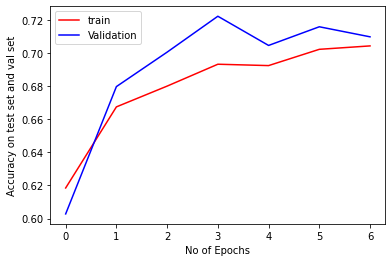

In [ ]:
#Plotting Accuracy
import matplotlib.pyplot as plt 
plt.plot(history.history['accuracy'], color= 'red', label = 'train')
plt.plot(history.history['val_accuracy'], color = 'blue', label = 'Validation')
plt.xlabel('No of Epochs')
plt.ylabel('Accuracy on test set and val set')
plt.legend()
plt.show()

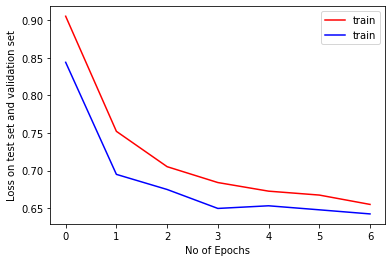

In [ ]:
#Plotting Loss
plt.plot(history.history['loss'], color= 'red', label = 'train')
plt.plot(history.history['val_loss'], color = 'blue', label = 'train')
plt.xlabel('No of Epochs')
plt.ylabel('Loss on test set and validation set')
plt.legend()
plt.show()

In [ ]:
tf.keras.models.save_model(model_r,'/content/drive/MyDrive/resnet_model.h5')

In [ ]:
score_r = model_r.evaluate(test_set)


35/55 [==================>...........] - ETA: 3:37 - loss: 0.6248 - accuracy: 0.7277

KeyboardInterrupt: ignored

#Incpetion V3 training 


In [ ]:
# Creating Dataset 
train_data = tf.keras.utils.image_dataset_from_directory(
    directory='/kaggle/input/pnemonia-tb-dataset/final_dataset/train',
    labels ='inferred',
    label_mode = 'int',
    image_size=(229, 229),
    batch_size = 32
)

val_data = tf.keras.utils.image_dataset_from_directory(
    directory='/kaggle/input/pnemonia-tb-dataset/final_dataset/val',
    labels ='inferred',
    label_mode = 'int',
    image_size=(229, 229),
    batch_size = 32
)

test_data = tf.keras.utils.image_dataset_from_directory(
    directory='/kaggle/input/pnemonia-tb-dataset/final_dataset/test',
    labels ='inferred',
    label_mode = 'int',
    image_size=(229, 229),
    batch_size = 32
)

In [ ]:
base_model = tf.keras.applications.InceptionV3(
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(229, 229, 3),
    pooling=None,
    classes=1000,
    classifier_activation="linear",
)
base_model.trainable = False

In [ ]:
model_i = tf.keras.Sequential()

model_i.add(base_model)
model_i.add(tf.keras.layers.GlobalAveragePooling2D())
# model.add(keras.layers.Dropout(0.2))
model_i.add(Flatten())
model_i.add(tf.keras.layers.Dense(512, activation="linear"))
model_i.add(tf.keras.layers.Dense(3, activation="linear"))

In [ ]:
model_i.compile(loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
              optimizer='adam',
             metrics=['accuracy']
              )

In [ ]:
#Training the Data, training with gpu
with tf.device('/device:GPU:0'):
  history_i = model_i.fit(train_set, validation_data = val_set,  epochs =20)


In [ ]:
plt.plot(history_i.history['accuracy'], color= 'red', label = 'train')
plt.plot(history_i.history['val_accuracy'], color = 'blue', label = 'Validation')
plt.xlabel('No of Epochs')
plt.ylabel('Accuracy on test set and Validation set')
plt.legend()
plt.show()

In [ ]:
plt.plot(history_i.history['loss'], color= 'red', label = 'train')
plt.plot(history_i.history['val_loss'], color = 'blue', label = 'train')
plt.xlabel('No of Epochs')
plt.ylabel('Loss on Validation Set set')
plt.legend()
plt.show()

In [ ]:
tf.keras.models.save_model(model_i,'/content/drive/MyDrive/inception_model.h5')

In [ ]:
score_i = model_i.evaluate(test_set)